In [213]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle 
from sklearn import metrics
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier

import biom
import pandas as pd
from sklearn.svm import SVC

Automatically created module for IPython interactive environment


In [214]:
# Import some data to play with
#iris = datasets.load_iris()
#X = iris.data
#y = iris.target

#Amish
#m = pd.read_csv("/Users/silvalin/Desktop/ERSP_data/merged_bmi_mapping_final__original_study_amish_Fraser__.txt", sep="\t", index_col=0)
#m.columns

#Wu
#m = pd.read_csv("/Users/silvalin/Desktop/ERSP_data/merged_bmi_mapping_final__original_study_COMBO_Wu__.txt", sep="\t", index_col=0)
#m.columns

#HMP
m = pd.read_csv("/Users/silvalin/Desktop/ERSP_data/merged_bmi_mapping_final__original_study_HMP__.txt", sep="\t", index_col=0)
m.columns

#Turnbaugh
#m = pd.read_csv("/Users/silvalin/Desktop/ERSP_data/merged_bmi_mapping_final__original_study_Turnbaugh_mz_dz_twins__.txt", sep="\t", index_col=0)
#m.columns

#Yatsunenko
#m = pd.read_csv("/Users/silvalin/Desktop/ERSP_data/merged_bmi_mapping_final__original_study_Yatsunenko_GG__.txt", sep="\t", index_col=0)
#m.columns

#New_Study
#m = pd.read_csv("/Users/silvalin/Desktop/ERSP_data/958_prep_102_qiime_20161216-090741.txt", sep="\t", index_col=0)
#m.columns



Index(['BarcodeSequence', 'LinkerPrimerSequence', 'BMI', 'bmi_group_binned',
       'bmi_group_coded', 'original_study', 'combined_study_bmi_group',
       'PCR_PRIMERS', 'TARGET_SUBFRAGMENT', 'AGE', 'ELEVATION', 'LONGITUDE',
       'COUNTRY', 'SEQUENCING_METH', 'SAMPLE_CENTER', 'Description_duplicate',
       'ReversePrimer', 'COLLECTION_DATE', 'SEX', 'FAMILY_RELATIONSHIP_GG',
       'STUDY_CENTER', 'EXPERIMENT_CENTER', 'bmi_group_amish', 'RUN_CENTER',
       'LATITUDE', 'Description'],
      dtype='object')

In [215]:
#Amish
#X = biom.load_table("/Users/silvalin/Desktop/ERSP_data/Amish.biom")
#Wu
#X = biom.load_table("/Users/silvalin/Desktop/ERSP_data/Wu.biom")
#HMP
X = biom.load_table("/Users/silvalin/Desktop/ERSP_data/HMP.biom")
#Turnbaugh
#X = biom.load_table("/Users/silvalin/Desktop/ERSP_data/Turnbaugh.biom")
#Yatsunenko
#X = biom.load_table("/Users/silvalin/Desktop/ERSP_data/Yat.biom")
#New_Study
#X = biom.load_table("/Users/silvalin/Desktop/ERSP_data/newstudy.biom")

In [216]:

y = m[m.bmi_group_coded != "Overweight"].index
y_2 = m[m.bmi_group_coded != "Overweight"]

y_2.loc[y_2.bmi_group_binned == 3, 'bmi_group_binned'] = 0
#print(y_2.bmi_group_binned)

#how  many samples are lean 
#print(y_2)
y_2[y_2.bmi_group_binned == 1]  #178 are lean

y_2[y_2.bmi_group_binned == 0]  #50 are obese

/Users/silvalin/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,BarcodeSequence,LinkerPrimerSequence,BMI,bmi_group_binned,bmi_group_coded,original_study,combined_study_bmi_group,PCR_PRIMERS,TARGET_SUBFRAGMENT,AGE,...,ReversePrimer,COLLECTION_DATE,SEX,FAMILY_RELATIONSHIP_GG,STUDY_CENTER,EXPERIMENT_CENTER,bmi_group_amish,RUN_CENTER,LATITUDE,Description
#SampleID,,,,,,,,,,,,,,,,,,,,,
SRS011300.395721,TCAGCCACGGTC,ATTACCGCGGCTGCTGG,32,0,Obese,HMP,Obese_HMP,FWD: CCATCTCATCCCTGCGTGTCTCCGA;REV:ATTACCGCGGC...,V13,33.0,...,no_data,2008-2010,male,no_data,WUGSC,WUGSC,no_data,WUGSC,37.09,HMP_production_phase_1
SRS011653.394993,TCAGAGTTGGC,ATTACCGCGGCTGCTGG,30,0,Obese,HMP,Obese_HMP,FWD: CCATCTCATCCCTGCGTGTCTCCGA;REV:ATTACCGCGGC...,V13,27.0,...,no_data,2008-2010,female,no_data,WUGSC,WUGSC,no_data,WUGSC,37.09,HMP_production_phase_1
SRS013216.399928,TCAGTTCTTCGTC,CCGTCAATTCMTTTRAGT,31,0,Obese,HMP,Obese_HMP,FWD:CCATCTCATCCCTGCGTGTCTCCGA;REV:CCGTCAATTCMT...,V35,27.0,...,no_data,2008-2010,male,no_data,BI,BI,no_data,BI,37.09,HMP_production_phase_1
SRS013638.400087,TCAGCCTTCCGC,CCGTCAATTCMTTTRAGT,32,0,Obese,HMP,Obese_HMP,FWD:CCATCTCATCCCTGCGTGTCTCCGA;REV:CCGTCAATTCMT...,V35,33.0,...,no_data,2008-2010,male,no_data,BI,BI,no_data,BI,37.09,HMP_production_phase_1
SRS013762.393921,TCAGACCGTAATC,ATTACCGCGGCTGCTGG,30,0,Obese,HMP,Obese_HMP,FWD: CCATCTCATCCCTGCGTGTCTCCGA;REV:ATTACCGCGGC...,V13,25.0,...,no_data,2008-2010,male,no_data,BCM,BCM,no_data,BCM,37.09,HMP_production_phase_1
SRS014235.403378,TCAGCAAGAAC,CCGTCAATTCMTTTRAGT,32,0,Obese,HMP,Obese_HMP,FWD:CCATCTCATCCCTGCGTGTCTCCGA;REV:CCGTCAATTCMT...,V35,NaN,...,no_data,2008-2010,male,no_data,WUGSC,WUGSC,no_data,WUGSC,37.09,HMP_production_phase_1
SRS014442.393402,TCAGTGCCGAAC,ATTACCGCGGCTGCTGG,30,0,Obese,HMP,Obese_HMP,FWD: CCATCTCATCCCTGCGTGTCTCCGA;REV:ATTACCGCGGC...,V13,25.0,...,no_data,2008-2010,female,no_data,WUGSC,WUGSC,no_data,WUGSC,37.09,HMP_production_phase_1
SRS014659.394185,TCAGATACCAC,ATTACCGCGGCTGCTGG,30,0,Obese,HMP,Obese_HMP,FWD: CCATCTCATCCCTGCGTGTCTCCGA;REV:ATTACCGCGGC...,V13,37.0,...,no_data,2008-2010,male,no_data,WUGSC,WUGSC,no_data,WUGSC,37.09,HMP_production_phase_1
SRS015281.395595,TCAGTTGGAGGC,ATTACCGCGGCTGCTGG,31,0,Obese,HMP,Obese_HMP,FWD: CCATCTCATCCCTGCGTGTCTCCGA;REV:ATTACCGCGGC...,V13,37.0,...,no_data,2008-2010,male,no_data,WUGSC,WUGSC,no_data,WUGSC,37.09,HMP_production_phase_1


In [217]:
m.index

Index(['SRS011271.396367', 'SRS011410.396107', 'SRS011415.394388',
       'SRS011529.396185', 'SRS011586.393765', 'SRS011621.394454',
       'SRS012191.395151', 'SRS013177.401537', 'SRS013386.400409',
       'SRS013543.394407',
       ...
       'SRS049157.403739', 'SRS049959.401022', 'SRS056620.394943',
       'SRS057447.396161', 'SRS063068.403097', 'SRS063524.397569',
       'SRS063827.396534', 'SRS065263.395822', 'SRS065466.395776',
       'SRS065725.395071'],
      dtype='object', name='#SampleID', length=208)

In [218]:
p = pd.DataFrame(X.matrix_data.T.todense().astype(int), index=X.ids(axis="sample"), columns=X.ids(axis="observation"))

In [219]:
c = p.loc[y, :]
print(c)

                  193008  186596  174924  189110  193591  198751  1110988  \
#SampleID                                                                   
SRS011271.396367     0.0     0.0     0.0     0.0     0.0     0.0      0.0   
SRS011410.396107     0.0     0.0     0.0     0.0     0.0     0.0      0.0   
SRS011415.394388     0.0     0.0     0.0     0.0     0.0     0.0      0.0   
SRS011529.396185     0.0     0.0     0.0     1.0     0.0     0.0      0.0   
SRS011586.393765     0.0     0.0     0.0     0.0     0.0     0.0      0.0   
SRS011621.394454     0.0     0.0     0.0     0.0     0.0     0.0      0.0   
SRS012191.395151     0.0     0.0     1.0     0.0     0.0     0.0      0.0   
SRS013177.401537     0.0     0.0     0.0     0.0     0.0     0.0      0.0   
SRS013386.400409     0.0     0.0     0.0     0.0     0.0     0.0      0.0   
SRS013543.394407     0.0     0.0     0.0     0.0     0.0     0.0      0.0   
SRS013687.400715     0.0     0.0     0.0     0.0     0.0     0.0      0.0   

In [220]:
#Split data into test, train, validation sets (60% training, 20% test, 20% validation)
#X_train, X_test, y_train, y_test = train_test_split(c.fillna(0).as_matrix(), y_2.treatment, test_size=0.50)
X_train, X_test, y_train, y_test = train_test_split(c.fillna(0).as_matrix(), y_2.bmi_group_binned,random_state=0)

In [221]:
# Learn to predict each class against the other , Yat
#classifier = RandomForestClassifier(max_features='sqrt', min_samples_split=2, n_estimators=100, max_depth=4, min_samples_leaf=10, random_state=1)
#classifier.fit(X_train, y_train)

# Learn to predict each class against the other , Turnbaugh
#classifier = RandomForestClassifier(max_features= 'log2', min_samples_split= 15, n_estimators= 500, max_depth= 5, min_samples_leaf= 4)
#classifier.fit(X_train, y_train)

# Learn to predict each class against the other , Wu
#classifier = RandomForestClassifier(max_features= 'sqrt', min_samples_split= 2, n_estimators= 100, max_depth= 4, min_samples_leaf= 6)
#classifier.fit(X_train, y_train)

# Learn to predict each class against the other , Amish
#classifier = RandomForestClassifier(max_features= 'log2', min_samples_split= 2, n_estimators= 50, max_depth= 3, min_samples_leaf= 8)
#classifier.fit(X_train, y_train)

# Learn to predict each class against the other , HMP
classifier = AdaBoostClassifier(n_estimators= 100, base_estimator= RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False), learning_rate= 2)
classifier.fit(X_train, y_train)

# Learn to predict each class against the other , Ercolini
#classifier = ExtrsTreesClassifier(max_features= 'log2', min_samples_split= 2, n_estimators= 20, max_depth= 2, min_samples_leaf= 4)
#classifier.fit(X_train, y_train)


AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
          learning_rate=2, n_estimators=100, random_state=None)

In [222]:
#can make 2 graphs with 0 and 1
#1:lean, 0:obese
y_pred_prob = classifier.predict_proba(X_test)[:, 0]

In [223]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

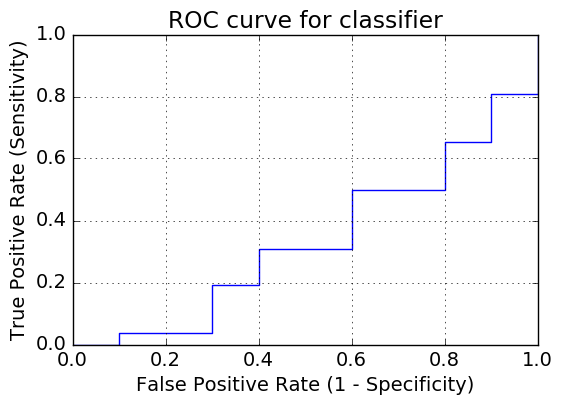

In [224]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

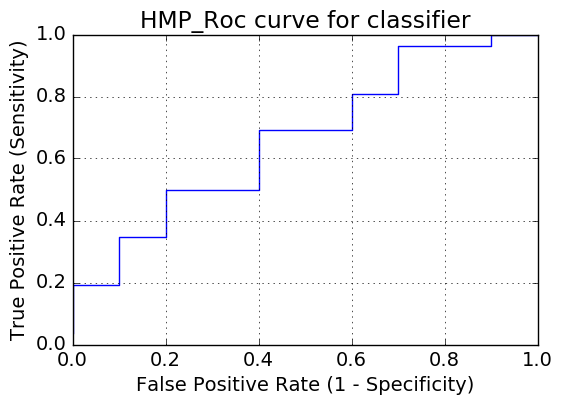

In [225]:
#0 is obese, 1 is lean 
y_pred_prob = classifier.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('HMP_Roc curve for classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [226]:
print(metrics.roc_auc_score(y_test, y_pred_prob))


0.665384615385


In [227]:
#this value should match the results in the group log
from sklearn.cross_validation import cross_val_score
cross_val_score(classifier, c.fillna(0).as_matrix(), y_2.bmi_group_binned, cv=10, scoring='roc_auc').mean()
#cross_val_score(max_features= 'log2', min_samples_split= 15, n_estimators= 500, max_depth= 5, min_samples_leaf= 4).mean()

0.50744949494949498

In [197]:
#classifier.predict(X_test)[0:10]